# Tree Survival Prediction Dataset - EDA Preprocessing Pipelines

## Introduction 
This activity consists in performing exporatory data analysis (EDA) followed by building preprocessing pipelines to feed a simple classification model.

The dataset chosen contains information about the passenger 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [4]:
data = pd.read_csv('../data/Tree_Data.csv')
data

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0,NaN,NaN
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,NaN,NaN
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,NaN,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [33]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   str    
 3   Species      2783 non-null   str    
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   str    
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   str    
 8   Adult        2783 non-null   str    
 9   Sterile      2783 non-null   str    
 10  Conspecific  2783 non-null   str    
 11  Myco         2783 non-null   str    
 12  SoilMyco     2783 non-null   str    
 13  PlantDate    2783 non-null   str    
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census       2783

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,2783.0,3914.513834,2253.515063,3.000,1971.000,3932.000,5879.000,7772.000
Plot,2783.0,9.561624,5.203659,1.000,5.000,10.000,14.000,18.000
Light_ISF,2783.0,0.085707,0.025638,0.032,0.066,0.082,0.100,0.161
Core,2783.0,2016.648940,0.477387,2016.000,2016.000,2017.000,2017.000,2017.000
AMF,2783.0,20.553069,12.309587,0.000,13.400,18.000,24.445,100.000
EMF,1283.0,26.476750,16.636890,0.000,13.780,27.720,35.710,87.500
Phenolics,2783.0,1.933105,1.969842,-1.350,0.170,0.750,3.780,6.100
Lignin,2783.0,15.759792,6.779607,2.230,10.355,14.040,21.115,32.770
NSC,2783.0,14.219641,4.298271,4.300,11.605,12.660,17.275,29.450
Census,2783.0,15.282070,9.166555,4.000,7.000,13.000,18.000,33.000


In total we have 24 unique columns, the source describes them as so:
1. No: Unique ID per seedling
2. Plot: Number of the field plot where the seedling was planted in (1-18).
3. Subplot: Subplot within the main plot the seedling was planted in (A-E).
4. Species: Species of the seedling (Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra).
5. Light ISF: Represents the amount of light reaching each subplot at a height of 1m.
6. Light Cat: Categorical light level, which is the range of Light_ISF split into (low, med, high)
7. Core: Year the soil core was removed from the field
8. Soil: Species from which the soil was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species.
9. Adult: Individual tree that soil was taken from.
10. Sterile: Whether the soil is sterelized or not.
11. Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific.
12. Myco: Mycorrhizal type of the seedling species (AMF or EMF).
13. SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF).
14. PlantDate: The date that seedlings were planted in the field pots.
15. AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.
16. EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.
17. Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods).
15. NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods).
16. Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods).
17. Census: The census number at which time the seedling died or was harvested.
18. Time: The number of days at which time the seedling died or was harvested.
19. Event: Used for survival analysis to indicate status of each individual seedling at a given time (above)
0 = harvested or experiment ended
1 = dead
20. Harvest: Indicates whether the seedling was harvested for trait measurement.
21. Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.

For this analysis we will drop the columns 'PassengerID', 'Adult', 'Plot' and 'Subplot' since they are indexes and do not provide useful information for our classification. Since 'Harvest' has only 704/2783 registers we'll drop it. We will also drop 'Light_Cat' to avoid redundancy since it's derived from 'Light_ISF'. Finally 'Core' will also be dropped since in this analysis we don't want to take into account the time component. I consider that if we wanted to take into account the time component to also study climate change we would need a more complex analysis than this.

This leaves us with the following features:
- Species
- Light_ISF
- Soil
- Sterile
- AMF
- EMF
- Phenolics
- Lignin
- NSC

As for the target we picked 'Alive' instead of 'Event' since in this analysis we only care about wether the tree survived or not, we're not analysing the time component.



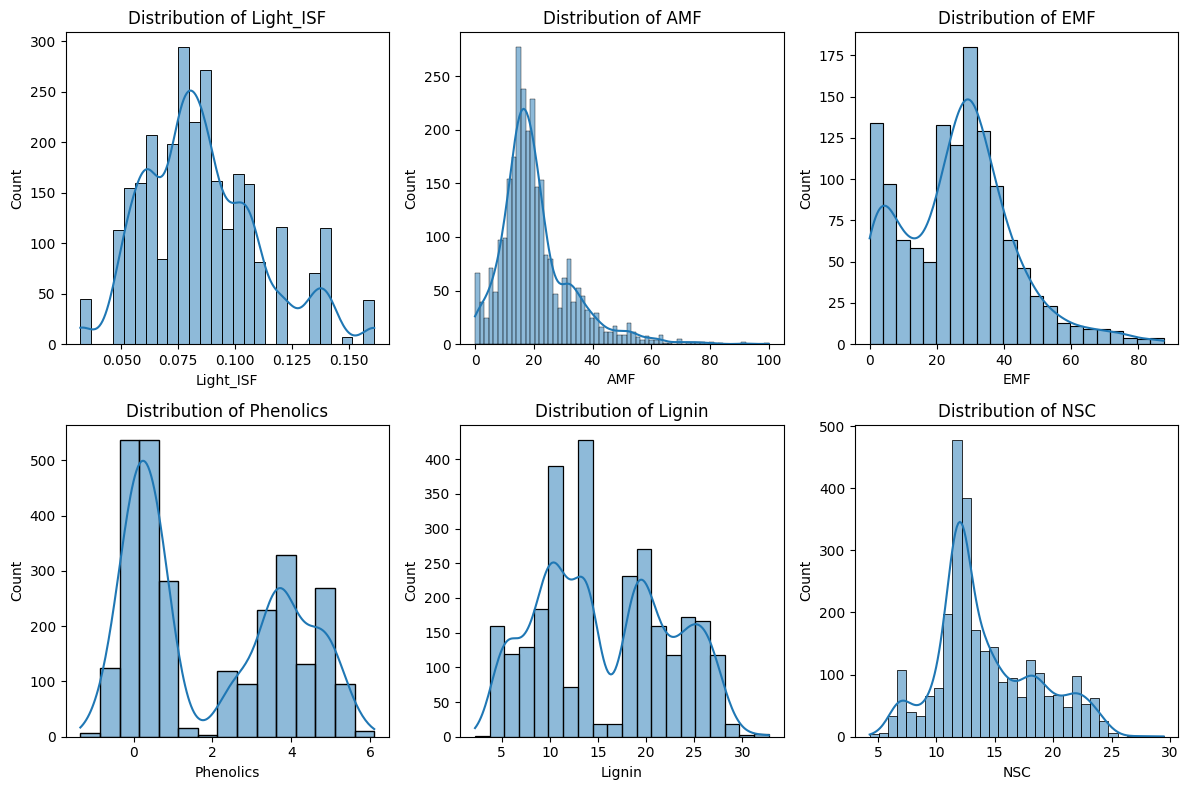

In [8]:
numerical_cols = ['Light_ISF', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    

fig.tight_layout()


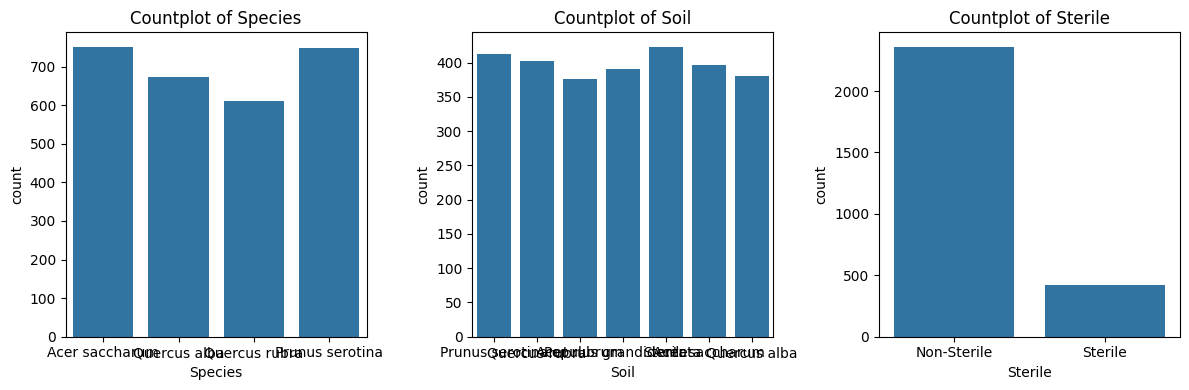

In [9]:
categorical_cols = ['Species', 'Soil', 'Sterile']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()



Since 'Alive' uses null values to represent dead trees and 'X' to represent alive. We'll convert to 0s and 1s respectevely.

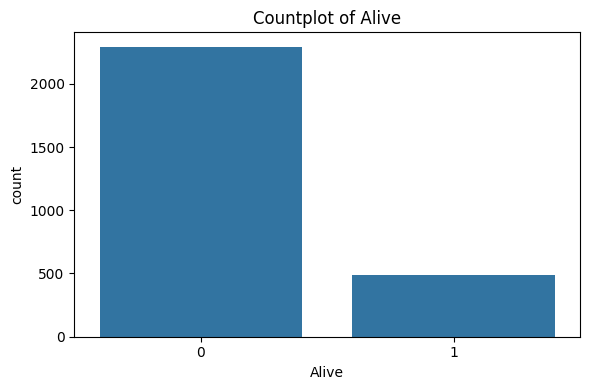

In [11]:
# convert target to binary
data['Alive'] = data['Alive'].apply(lambda x: 1 if x == 'X' else 0)

fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Alive')
plt.title('Countplot of Alive')
plt.tight_layout()



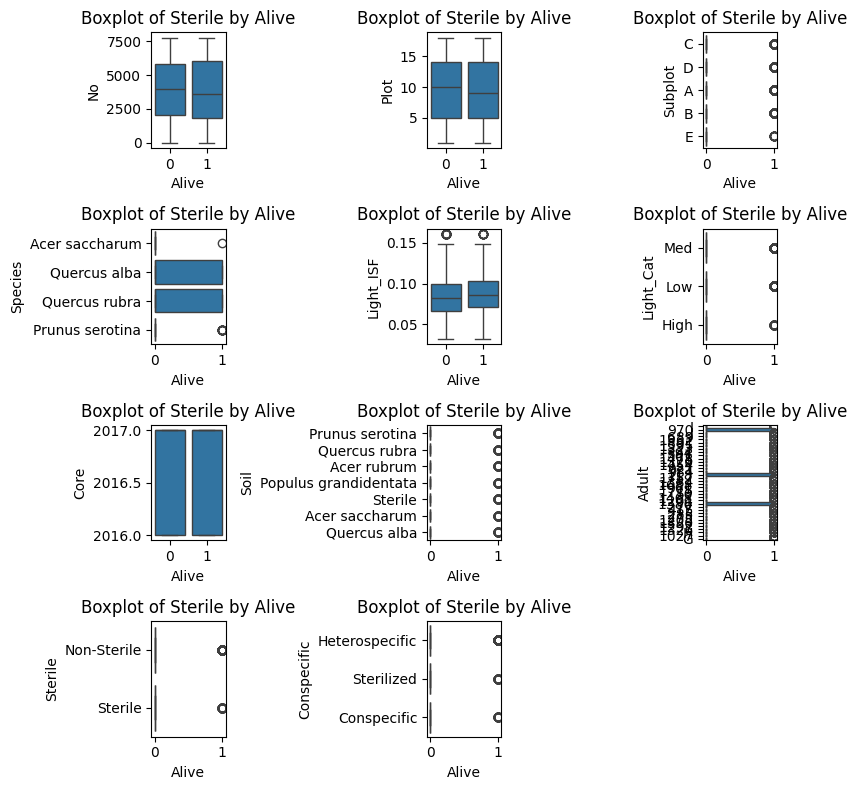

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8))

for ax, feature in zip(axs.ravel(), data.columns[:-1]):
    sns.boxplot(data=data, x='Alive', y=feature, ax=ax)
    ax.set_title(f'Boxplot of {col} by Alive')

for ax in axs.ravel()[-1:]:
    ax.set_visible(False)

fig.tight_layout()

#AAAAAAAAAAAA

